In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

<h1> Correlation Analysis </h1>

In [5]:
df = pd.read_csv("/content/drive/MyDrive/ProbStats Project/cases_and_passenger_travel_data.csv")

Selecting data from the start of the first lockdown imposed in the US (i.e. March 19, 2020).

In [6]:
df_new = df[df['Date']>='2020-03-19']

In [7]:
df_new.head()

,Date,total_cases_cum,total_death_cum,total_cases,total_death,travel_count
56,2020-03-19,23867,282,6121.0,69.0,548132.0
57,2020-03-20,31414,374,7547.0,92.0,454516.0
58,2020-03-21,40536,486,9122.0,112.0,331431.0
59,2020-03-22,51367,608,10845.0,122.0,279018.0
60,2020-03-23,62086,770,10692.0,161.0,239234.0


Now we will find the correlation between total deaths and travel_count

In [8]:
def pearson_corr(data1, data2):
  num = np.sum((data1 - np.mean(data1))*(data2 - np.mean(data2)))
  den = (np.sum((data1 - np.mean(data1))**2)* np.sum((data2 - np.mean(data2))**2))**0.5
  return num/den

In [9]:
data1 = df_new['total_death']
data2 = df_new['travel_count']
pearson_corr(data1,data2)

-0.3357556690738906

In [10]:
dates = df_new['Date'].apply(lambda x:x.split("-")[0])

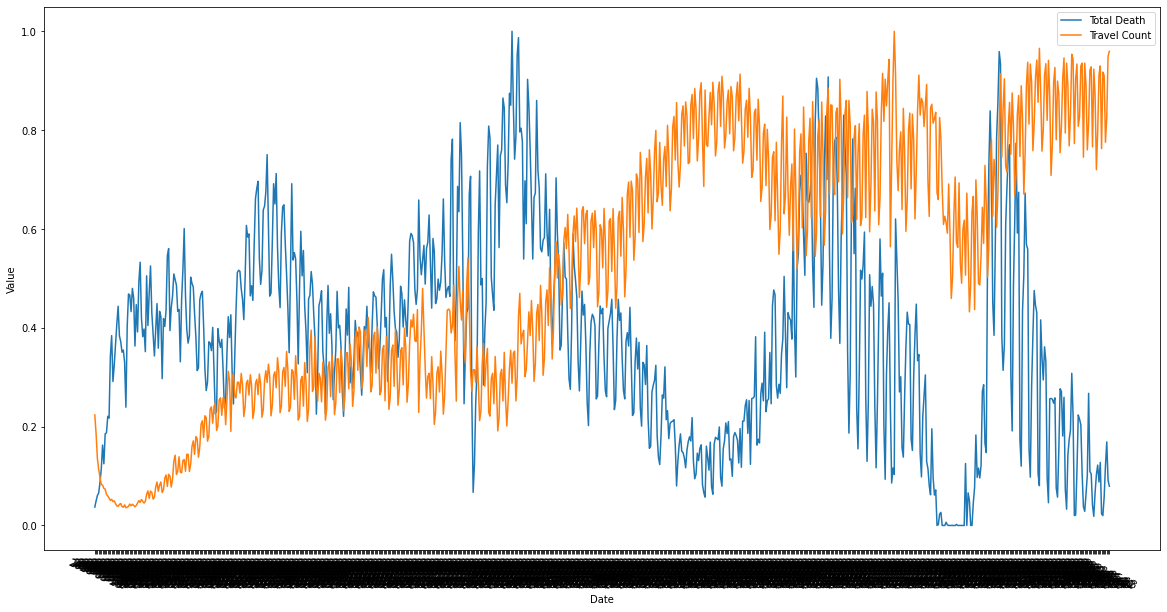

In [11]:
plt.figure(figsize=(20, 10))
plt.plot(df_new['Date'],data1/data1.abs().max())
plt.plot(df_new['Date'],data2/data2.abs().max())
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend(['Total Death','Travel Count'])
plt.xticks(rotation=-25)
plt.show()

Using Pearson Correlation to find whether X&Y are linearly dependent or not.

H0: Total no. of passengers travelling via air is linearly dependent on no. of deaths dues to COVID.
H1: Total no. of passengers travelling via air is not linearly dependent on no. of deaths dues to COVID.

Steps Followed:
1. Selected Data from the start of the first lockdown imposed in the US (i.e. March 19, 2020).
2. Found Pearson Correlation between total deaths and travel count.
Pearson Correlation = -0.3357556690738906

This tells us that as the no. of deaths increases travel count decreases which totally makes sense. 

As the graph suggests that some portion of the data is highly linearly correlated and some portion is not, maybe due to introduction of vaccine or some other factor. Hence, I choose to take arbitray value to 0.30 as the threshold hence we can say that there is some linear relationship between Total no. of passengers and no. of deaths. 